In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4)

In [46]:
import pandas as pd
training = pd.read_csv(r'D:/tableau/train.csv',index_col='Id')
training.head(10)
xtrain=training[["Lat","Long"]]
ytrain=training["ConfirmedCases"]
training

,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
Id,,,,,,,
1,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0.0,0.0
2,NaN,Afghanistan,33.0000,65.0000,2020-01-23,0.0,0.0
3,NaN,Afghanistan,33.0000,65.0000,2020-01-24,0.0,0.0
4,NaN,Afghanistan,33.0000,65.0000,2020-01-25,0.0,0.0
5,NaN,Afghanistan,33.0000,65.0000,2020-01-26,0.0,0.0
...,...,...,...,...,...,...,...
26376,NaN,Zambia,-15.4167,28.2833,2020-03-18,2.0,0.0
26377,NaN,Zambia,-15.4167,28.2833,2020-03-19,2.0,0.0
26378,NaN,Zambia,-15.4167,28.2833,2020-03-20,2.0,0.0


In [4]:
pd.options.display.max_rows=10

In [5]:
testing=pd.read_csv(r'D:/tableau/test.csv')

In [6]:
testing.info()
testing.dtypes[testing.dtypes == 'object']
xtest=testing[["Lat","Long","Date"]]
xtest
testing.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ForecastId      12212 non-null  int64  
 1   Province/State  5590 non-null   object 
 2   Country/Region  12212 non-null  object 
 3   Lat             12212 non-null  float64
 4   Long            12212 non-null  float64
 5   Date            12212 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 572.6+ KB


Index(['ForecastId', 'Province/State', 'Country/Region', 'Lat', 'Long',
       'Date'],
      dtype='object')

In [7]:
training.info()
training.dtypes
training.dtypes[training.dtypes == 'object']
training.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17324 entries, 1 to 26380
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  7930 non-null   object 
 1   Country/Region  17324 non-null  object 
 2   Lat             17324 non-null  float64
 3   Long            17324 non-null  float64
 4   Date            17324 non-null  object 
 5   ConfirmedCases  17324 non-null  float64
 6   Fatalities      17324 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.1+ MB


Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'ConfirmedCases', 'Fatalities'],
      dtype='object')

In [37]:
training.shape

(17324, 7)

In [8]:
testing.fillna('N/A').groupby(['Country/Region','Province/State']).count()

,,ForecastId,Lat,Long,Date
Country/Region,Province/State,,,,
Afghanistan,N/A,43,43,43,43
Albania,N/A,43,43,43,43
Algeria,N/A,43,43,43,43
Andorra,N/A,43,43,43,43
Antigua and Barbuda,N/A,43,43,43,43
...,...,...,...,...,...
Uruguay,N/A,43,43,43,43
Uzbekistan,N/A,43,43,43,43
Venezuela,N/A,43,43,43,43


In [9]:
traincountry = training["Country/Region"].value_counts()

In [10]:
countrycase = training.fillna('N/A').groupby(['Country/Region','Province/State'])['ConfirmedCases','Fatalities'].max().sort_values(by='ConfirmedCases',ascending=False)
countrycase.head(10)

C:\Users\ranjan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,,ConfirmedCases,Fatalities
Country/Region,Province/State,,
China,Hubei,67800.0,3144.0
Italy,N/A,59138.0,5476.0
Spain,N/A,28768.0,1772.0
Germany,N/A,24873.0,94.0
Iran,N/A,21638.0,1685.0
France,France,16018.0,674.0
US,New York,15793.0,117.0
"Korea, South",N/A,8897.0,104.0
Switzerland,N/A,7245.0,98.0


In [14]:
countries = countrycase.groupby('Country/Region')['ConfirmedCases','Fatalities'].sum().sort_values(by= 'ConfirmedCases',ascending=False)
countries

C:\Users\ranjan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,ConfirmedCases,Fatalities
Country/Region,,
China,79071.0,3224.0
Italy,59138.0,5476.0
US,33084.0,413.0
Spain,28768.0,1772.0
Germany,24873.0,94.0
...,...,...
The Gambia,0.0,0.0
The Bahamas,0.0,0.0
Guernsey,0.0,0.0


In [11]:
training.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Province/State,7930,128,Grand Princess,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country/Region,17324,163,US,3538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lat,17324,NaN,NaN,NaN,26.2877,22.9351,-41.4545,13.1454,32.9856,42.5016,71.7069
Long,17324,NaN,NaN,NaN,4.76619,79.9233,-157.498,-71.5164,9.775,64.689,174.886
Date,17324,61,2020-03-11,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConfirmedCases,17324,NaN,NaN,NaN,293.191,3382.67,0,0,0,8,67800
Fatalities,17324,NaN,NaN,NaN,10.4212,155.612,0,0,0,0,5476


In [15]:
countries['country'] = countries.index

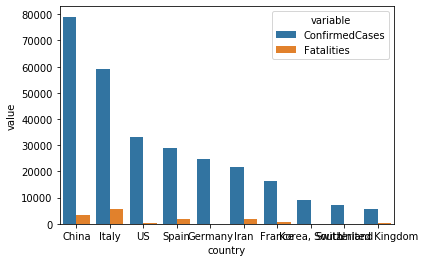

In [16]:
trainlong = pd.melt(countries, id_vars=['country'] , value_vars=['ConfirmedCases','Fatalities'])# convert wide to long
trainlong
#Top countries by confirmed cases
topcountries = countries.index[:10]

traintopcountries = trainlong[trainlong['country'].isin(topcountries)]
ax = sns.barplot(x = 'country', hue="variable", y="value", data=traintopcountries)


In [17]:
print(training.Date.min(), training.Date.max())

2020-01-22 2020-03-22


In [18]:
trainlong["variable"].value_counts()

Fatalities        163
ConfirmedCases    163
Name: variable, dtype: int64

In [19]:
statusaffected = trainlong[trainlong['variable']=='ConfirmedCases']
statusaffected.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
value,163.0,2038.822086,8812.725662,0.0,13.5,88.0,405.0,79071.0


In [20]:
statusdead = trainlong[trainlong['variable']=='Fatalities']
statusdead.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
value,163.0,89.546012,531.911359,0.0,0.0,1.0,4.0,5476.0


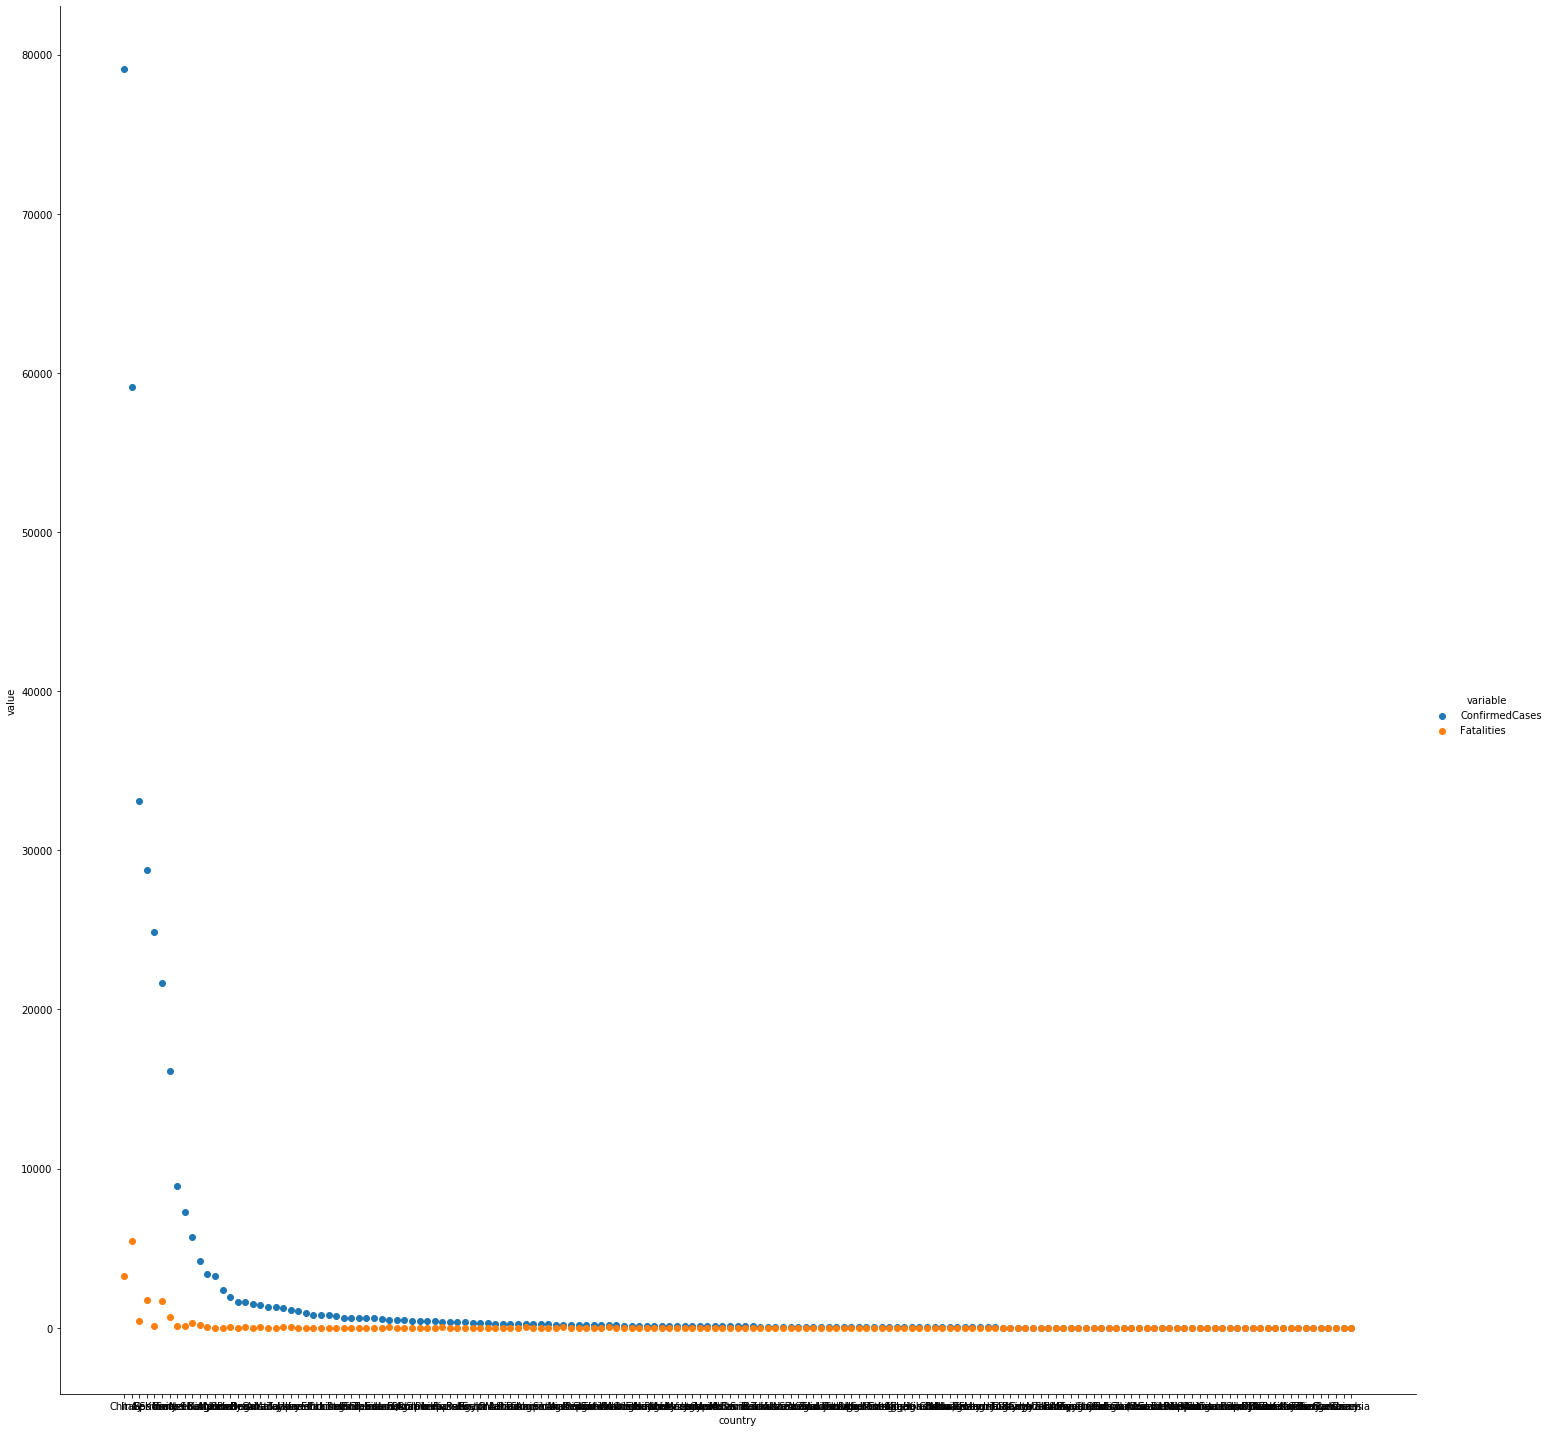

In [34]:
sns.FacetGrid(trainlong,hue="variable",size=20).map(plt.scatter,"country","value").add_legend();
plt.show() # univariant analysis

C:\Users\ranjan\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


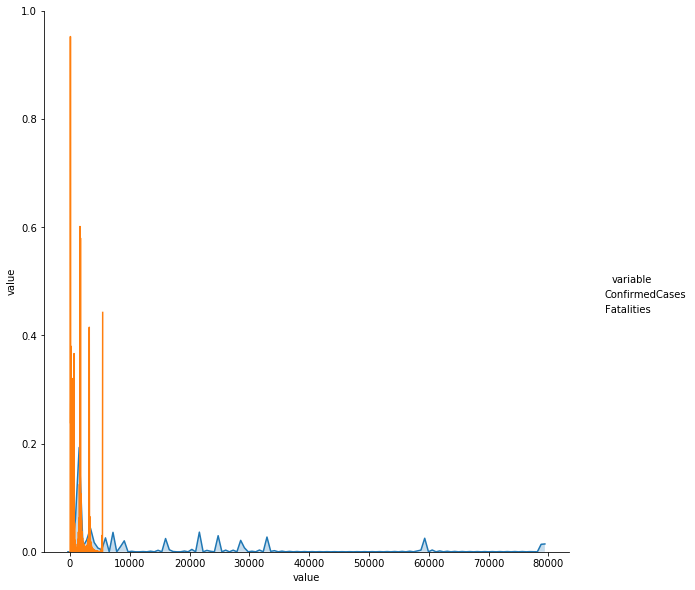

In [29]:
sns.pairplot(trainlong,hue="variable",size=8) # multivariable analysis

In [27]:
testing

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0000,65.0000,2020-03-12
1,2,NaN,Afghanistan,33.0000,65.0000,2020-03-13
2,3,NaN,Afghanistan,33.0000,65.0000,2020-03-14
3,4,NaN,Afghanistan,33.0000,65.0000,2020-03-15
4,5,NaN,Afghanistan,33.0000,65.0000,2020-03-16
...,...,...,...,...,...,...
12207,12208,NaN,Zambia,-15.4167,28.2833,2020-04-19
12208,12209,NaN,Zambia,-15.4167,28.2833,2020-04-20
12209,12210,NaN,Zambia,-15.4167,28.2833,2020-04-21
12210,12211,NaN,Zambia,-15.4167,28.2833,2020-04-22


In [53]:
type(training.Date)
newtrain = pd.concat([xtrain,traincountry])

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [43]:
 # Creating the classifier object 
giniindexvalue = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)

In [47]:
#Performing training 
giniindexvalue.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [48]:
# Decision tree with entropy 
entropyvalue = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)

In [50]:
# Performing training 
entropyvalue.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')